### In this setup we will use Fibonacci Level price only


In [1]:
import pandas as pd 
import numpy as np

pd.options.display.max_columns=None

import warnings
warnings.filterwarnings('ignore')

In [2]:
from Scripts import *
print(DATA_HOME)

E:\Msc\LabTest\stockAnalysis\datab


In [3]:
apollohosp = pd.read_csv(DATA_HOME+'\\apollohosp\\apollohosp_master.csv')
apollohosp = apollohosp.drop(['Close','LeadingFibonacciLevel'],axis=1)
apollohosp.head(5)

,Date,Volume,Revenue,Other Income,Total Income,Expenditure,Operating Profit,Interest,PBDT,Depreciation,PBT,Tax,Net Profit,EPS (Rs),RSI,stockRSI,macd_strength,macd,macd_h,ema,CI,Bollinger_centralBand,Bollinger_upperBand,Bollinger_lowerband,FibonacciLevels,LeadingClose
0,2016-01-01,107024,1680.61,3.08,1683.69,1486.53,1333.5,51.33,73.0,61.76,84.07,11.24,72.83,5.23,64.077246,1.939377,1415.803545,27.112706,-1388.690839,1388.802525,56.635556,1403.824646,1458.313121,1349.336171,1416.966919,1418.042358
1,2016-01-04,121226,1680.61,3.08,1683.69,1486.53,1333.5,51.33,73.0,61.76,84.07,11.24,72.83,5.23,60.422239,1.670450,1416.251308,25.887594,-1390.363714,1391.460692,59.080965,1407.320600,1458.384359,1356.256841,1413.055129,1436.035645
2,2016-01-05,667535,1680.61,3.08,1683.69,1486.53,1333.5,51.33,73.0,61.76,84.07,11.24,72.83,5.23,64.203471,1.948665,1420.208175,26.068095,-1394.140080,1395.512960,52.770482,1412.660575,1458.333773,1366.987377,1464.590068,1423.176514
3,2016-01-06,233987,1680.61,3.08,1683.69,1486.53,1333.5,51.33,73.0,61.76,84.07,11.24,72.83,5.23,59.805908,1.625101,1420.801843,24.886641,-1395.915202,1398.027829,57.806178,1418.077401,1444.170582,1391.984220,1447.281599,1365.774170
4,2016-01-07,184861,1680.61,3.08,1683.69,1486.53,1333.5,51.33,73.0,61.76,84.07,11.24,72.83,5.23,44.991438,0.535084,1409.796308,19.098288,-1390.698020,1395.095678,54.026040,1416.135603,1452.360113,1379.911092,1417.944733,1373.499512


In [4]:
apollohosp['Date'] = pd.to_datetime(apollohosp['Date'],format='%Y-%m-%d')
apollohosp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Date                   1459 non-null   datetime64[ns]
 1   Volume                 1459 non-null   int64         
 2   Revenue                1459 non-null   float64       
 3   Other Income           1459 non-null   float64       
 4   Total Income           1459 non-null   float64       
 5   Expenditure            1459 non-null   float64       
 6   Operating Profit       1459 non-null   float64       
 7   Interest               1459 non-null   float64       
 8   PBDT                   1459 non-null   float64       
 9   Depreciation           1459 non-null   float64       
 10  PBT                    1459 non-null   float64       
 11  Tax                    1459 non-null   float64       
 12  Net Profit             1459 non-null   float64       
 13  EPS

In [5]:
apollohosp = apollohosp.set_index('Date')

In [6]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler

In [7]:
scaler= MinMaxScaler()
apollohosp_data = scaler.fit_transform(apollohosp.drop('LeadingClose',axis=1))

In [8]:
pca = PCA(n_components=10)
pca.fit(apollohosp_data)
print(pca.explained_variance_ratio_)

[0.6023969  0.1844499  0.10993606 0.04092815 0.02539747 0.01678431
 0.00871165 0.00377372 0.00331009 0.00277289]


In [9]:
n_pcs= pca.components_.shape[0]
most_important = [np.abs(pca.components_[i]).argmax() for i in range(n_pcs)]
initial_feature_names= apollohosp.columns
most_important_names = [initial_feature_names[most_important[i]] for i in range(n_pcs)]


dic1 = {'PC{}'.format(i): most_important_names[i] for i in range(n_pcs)}


df = pd.DataFrame(dic1.items())
df

,0,1
0,PC0,PBDT
1,PC1,Interest
2,PC2,EPS (Rs)
3,PC3,RSI
4,PC4,Other Income
5,PC5,CI
6,PC6,Expenditure
7,PC7,macd
8,PC8,Volume
9,PC9,macd


In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

<AxesSubplot:>

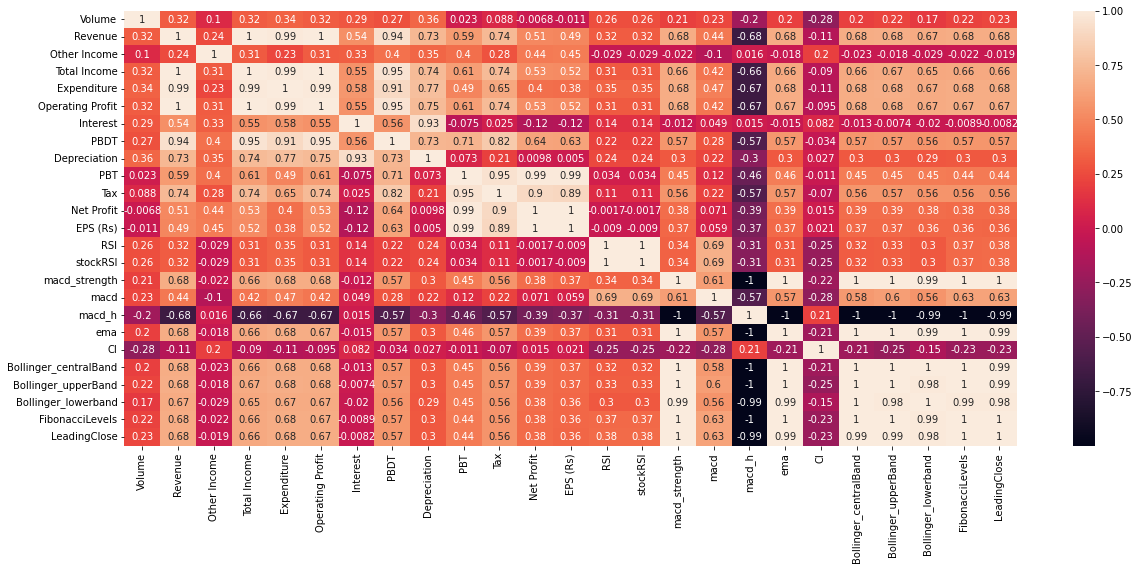

In [11]:
plt.figure(figsize=(20,8))
sns.heatmap(apollohosp.corr(),annot=True)

In [12]:
# Checking the same for other stocks
dabur = pd.read_csv(DATA_HOME+'\\dabur\\dabur_master.csv')
dabur = dabur.drop(['Close','LeadingFibonacciLevel'],axis=1)

dabur['Date'] = pd.to_datetime(dabur['Date'],format='%Y-%m-%d')

dabur = dabur.set_index('Date')

scaler= MinMaxScaler()
dabur_data = scaler.fit_transform(dabur.drop('LeadingClose',axis=1))

pca = PCA(n_components=10)
pca.fit(dabur_data)
print(pca.explained_variance_ratio_)

n_pcs= pca.components_.shape[0]
most_important = [np.abs(pca.components_[i]).argmax() for i in range(n_pcs)]
initial_feature_names= dabur.columns
most_important_names = [initial_feature_names[most_important[i]] for i in range(n_pcs)]


dic2 = {'PC{}'.format(i): most_important_names[i] for i in range(n_pcs)}


df = pd.DataFrame(dic2.items())
df

[0.50508901 0.20444656 0.07379129 0.06047005 0.05644328 0.02722082
 0.02401842 0.02227149 0.01093385 0.00640797]


,0,1
0,PC0,Expenditure
1,PC1,macd_h
2,PC2,RSI
3,PC3,Tax
4,PC4,EPS (Rs)
5,PC5,Interest
6,PC6,CI
7,PC7,Other Income
8,PC8,Interest
9,PC9,Volume


<AxesSubplot:>

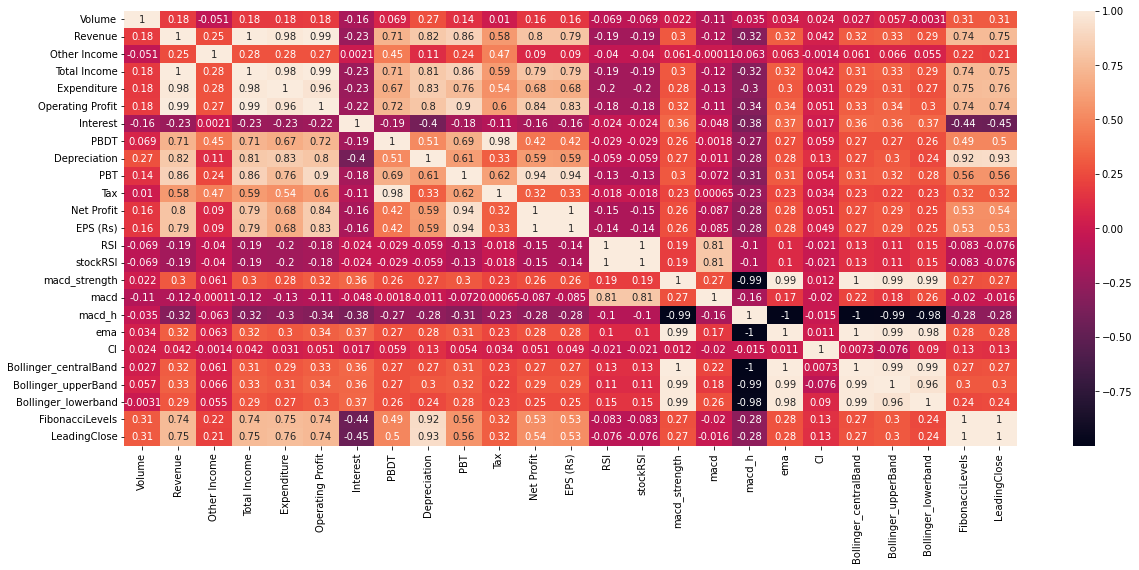

In [13]:
plt.figure(figsize=(20,8))
sns.heatmap(dabur.corr(),annot=True)

In [14]:
maruti = pd.read_csv(DATA_HOME+'\\maruti\\maruti_master.csv')
maruti = maruti.drop(['Close','LeadingFibonacciLevel'],axis=1)

maruti['Date'] = pd.to_datetime(maruti['Date'],format='%Y-%m-%d')

maruti = maruti.set_index('Date')

scaler= MinMaxScaler()
maruti_data = scaler.fit_transform(maruti.drop('LeadingClose',axis=1))

pca = PCA(n_components=10)
pca.fit(maruti_data)
print(pca.explained_variance_ratio_)

n_pcs= pca.components_.shape[0]
most_important = [np.abs(pca.components_[i]).argmax() for i in range(n_pcs)]
initial_feature_names= maruti.columns
most_important_names = [initial_feature_names[most_important[i]] for i in range(n_pcs)]


dic3 = {'PC{}'.format(i): most_important_names[i] for i in range(n_pcs)}


df = pd.DataFrame(dic3.items())
df

[0.4046742  0.27618412 0.10282191 0.07683603 0.05109004 0.02983091
 0.02409015 0.01700967 0.00799325 0.00496575]


,0,1
0,PC0,macd_h
1,PC1,Tax
2,PC2,stockRSI
3,PC3,Depreciation
4,PC4,Depreciation
5,PC5,Interest
6,PC6,CI
7,PC7,Other Income
8,PC8,Volume
9,PC9,macd


<AxesSubplot:>

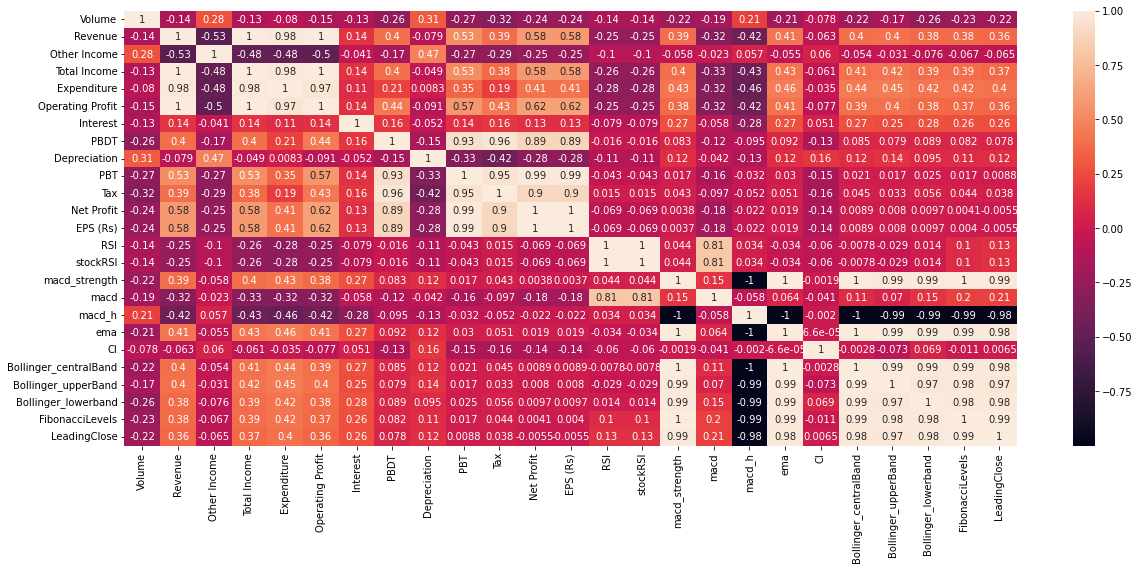

In [15]:
plt.figure(figsize=(20,8))
sns.heatmap(maruti.corr(),annot=True)

In [16]:
tcs = pd.read_csv(DATA_HOME+'\\tcs\\tcs_master.csv')
tcs = tcs.drop(['Close','LeadingFibonacciLevel'],axis=1)

tcs['Date'] = pd.to_datetime(tcs['Date'],format='%Y-%m-%d')

tcs = tcs.set_index('Date')

scaler= MinMaxScaler()
tcs_data = scaler.fit_transform(tcs.drop('LeadingClose',axis=1))

pca = PCA(n_components=10)
pca.fit(tcs_data)
print(pca.explained_variance_ratio_)

n_pcs= pca.components_.shape[0]
most_important = [np.abs(pca.components_[i]).argmax() for i in range(n_pcs)]
initial_feature_names= tcs.columns
most_important_names = [initial_feature_names[most_important[i]] for i in range(n_pcs)]


dic4 = {'PC{}'.format(i): most_important_names[i] for i in range(n_pcs)}


df = pd.DataFrame(dic4.items())
df

[0.74421734 0.08489634 0.05188382 0.04412127 0.03183945 0.01554062
 0.01089213 0.00646546 0.00519795 0.00303468]


,0,1
0,PC0,PBDT
1,PC1,Other Income
2,PC2,Interest
3,PC3,EPS (Rs)
4,PC4,RSI
5,PC5,CI
6,PC6,CI
7,PC7,Depreciation
8,PC8,PBDT
9,PC9,macd


<AxesSubplot:>

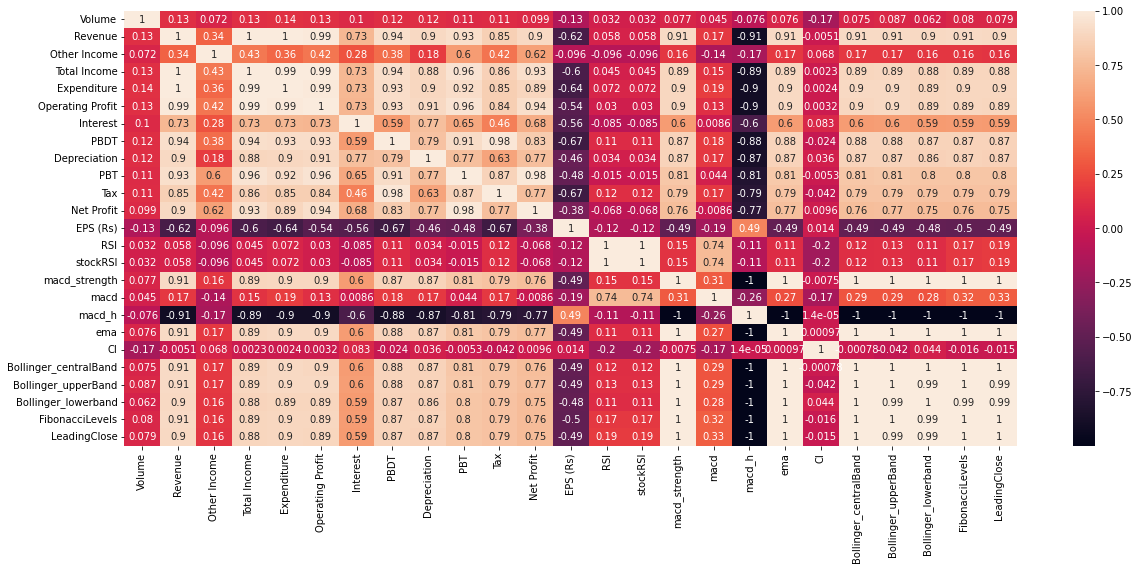

In [17]:
plt.figure(figsize=(20,8))
sns.heatmap(tcs.corr(),annot=True)

In [18]:
maruti.info(),tcs.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1459 entries, 2016-01-01 to 2021-11-30
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Volume                 1459 non-null   int64  
 1   Revenue                1459 non-null   float64
 2   Other Income           1459 non-null   float64
 3   Total Income           1459 non-null   float64
 4   Expenditure            1459 non-null   float64
 5   Operating Profit       1459 non-null   float64
 6   Interest               1459 non-null   float64
 7   PBDT                   1459 non-null   float64
 8   Depreciation           1459 non-null   float64
 9   PBT                    1459 non-null   float64
 10  Tax                    1459 non-null   float64
 11  Net Profit             1459 non-null   float64
 12  EPS (Rs)               1459 non-null   float64
 13  RSI                    1459 non-null   float64
 14  stockRSI               1459 non-null  

(None, None)

In [21]:
imp_col_list=['FibonacciLevels','PBDT','RSI','macd','Volume','EPS (Rs)','CI']


In [22]:
apollohosp = apollohosp[imp_col_list]
dabur=dabur[imp_col_list]
maruti=maruti[imp_col_list]
tcs=tcs[imp_col_list]

In [23]:
apollohosp.to_csv(DATA_HOME+'\\apollohosp\\apollohosp_expsetup2.csv')
dabur.to_csv(DATA_HOME+'\\dabur\\dabur_expsetup2.csv')
maruti.to_csv(DATA_HOME+'\\maruti\\maruti_expsetup2.csv')
tcs.to_csv(DATA_HOME+'\\tcs\\tcs_expsetup2.csv')